In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config IPCompleter.greedy=True

In [2]:
raw = pd.read_csv('Scorecard_Edited.csv', low_memory=False)
#source https://www.kaggle.com/kaggle/college-scorecard/home
# Code Book https://storage.googleapis.com/kaggle-datasets/11/6609/CollegeScorecardDataDictionary-09-12-2015.pdf
#each row in this dataset is a branch of a higher education institution. The data comes from the US Dept of Education Scorecard 
#and has been filtered down to the collected data that pertains to debt and earnings potential from 2003-2013.

In [3]:
raw.shape

(72032, 307)

In [4]:
raw.head()

,Id,UNITID,INSTNM,STABBR,AccredAgency,HCM2,main,NUMBRANCH,PREDDEG,CONTROL,...,mn_earn_wne_p8,md_earn_wne_p8,sd_earn_wne_p8,gt_25k_p8,count_nwne_p9,count_wne_p9,mn_earn_wne_p9,sd_earn_wne_p9,gt_25k_p9,Year
0,52668,100654,ALABAMA A & M UNIVERSITY,AL,NaN,0,True,1,Predominantly bachelor's-degree granting,Public,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004
1,52669,100663,UNIVERSITY OF ALABAMA AT BIRMINGHAM,AL,NaN,0,True,1,Predominantly bachelor's-degree granting,Public,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004
2,52670,100690,SOUTHERN CHRISTIAN UNIVERSITY,AL,NaN,0,True,1,Predominantly bachelor's-degree granting,Private nonprofit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004
3,52671,100706,UNIVERSITY OF ALABAMA IN HUNTSVILLE,AL,NaN,0,True,1,Predominantly bachelor's-degree granting,Public,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004
4,52672,100724,ALABAMA STATE UNIVERSITY,AL,NaN,0,True,1,Predominantly bachelor's-degree granting,Public,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004


In [5]:
#How many of these institutions are under private vs public control?
print("Total Institutions in population: " + str(raw['UNITID'].nunique()))
control = raw.groupby('CONTROL')['UNITID'].nunique()
control.sort_values(ascending=False)

Total Institutions in population: 9091


CONTROL
Private for-profit    4655
Public                2285
Private nonprofit     2265
Name: UNITID, dtype: int64

In [6]:
#Region?
regions = raw.groupby('region')['UNITID'].nunique()
regions.sort_values(ascending=False)

region
Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC, TN, VA, WV)    2257
Mid East (DE, DC, MD, NJ, NY, PA)                             1386
Great Lakes (IL, IN, MI, OH, WI)                              1356
Far West (AK, CA, HI, NV, OR, WA)                             1322
Southwest (AZ, NM, OK, TX)                                     949
Plains (IA, KS, MN, MO, NE, ND, SD)                            779
New England (CT, ME, MA, NH, RI, VT)                           514
Rocky Mountains (CO, ID, MT, UT, WY)                           346
Outlying Areas (AS, FM, GU, MH, MP, PR, PW, VI)                192
U.S. Service Schools                                             1
Name: UNITID, dtype: int64

In [7]:
#Religious Affiliation?
rel = raw.groupby('RELAFFIL')['UNITID'].nunique()
rel.sort_values(ascending=False).head(10)

RELAFFIL
None                           9084
Roman Catholic                  253
United Methodist                 95
Baptist                          72
Presbyterian Church (USA)        57
Interdenominational              36
Jewish                           36
Evangelical Lutheran Church      31
Other Protestant                 24
Southern Baptist                 23
Name: UNITID, dtype: int64

In [8]:
#Predominant Degree
preDeg = raw.groupby('PREDDEG')['UNITID'].nunique()
preDeg.sort_values(ascending=False)

PREDDEG
Predominantly certificate-degree granting    4559
Predominantly bachelor's-degree granting     2355
Predominantly associate's-degree granting    2100
Not classified                               1323
Entirely graduate-degree granting             408
Name: UNITID, dtype: int64

In [9]:
#How many are still operating as of the data's publication?
op = raw.groupby('CURROPER')['UNITID'].nunique()
op.sort_values(ascending=False)

CURROPER
True     7719
False    1990
Name: UNITID, dtype: int64

In [10]:
#Let's isolate the 2013 data to do some further exploration

yr13 = raw[raw['Year'] == 2013]
yr13.shape

(7804, 307)

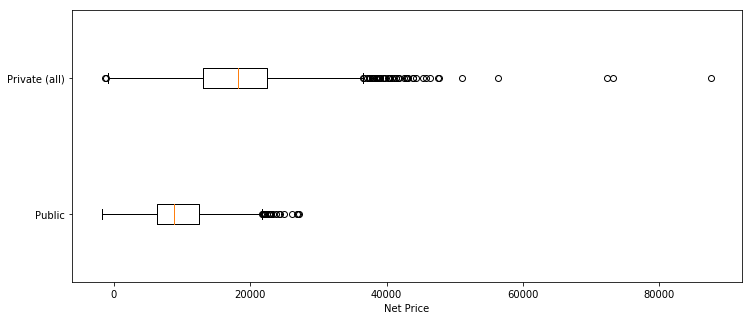

In [11]:
#What's the net price box & whisker look like?
#yr13['netp'] = yr13['NPT4_PUB'] + yr13['NPT4_PRIV']
#yr13['NPT4_PRIV'].dtypes #I confirmed they are both floats

yr13Pub = yr13[np.isnan(yr13.NPT4_PUB) == False]
yr13Priv = yr13[np.isnan(yr13.NPT4_PRIV) == False]
plt.figure(figsize=(12,5))
plt.boxplot([yr13Pub.NPT4_PUB,yr13Priv.NPT4_PRIV], labels=['Public','Private (all)'], vert=False)
plt.xlabel('Net Price')
plt.show()




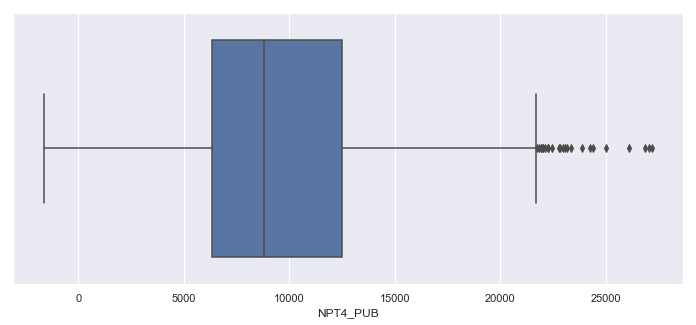

In [12]:
#try to replicate the above in seaborn, but I need to have the net price fields merged to work this I think.
sns.set(style="darkgrid")
plt.figure(figsize=(12,5))
ax = sns.boxplot(x='NPT4_PUB',data=yr13Pub)

In [13]:
raw.DEBT_MDN.dtype

dtype('float64')

In [14]:
#What connections can be made with student loans?

#create a df with only the rows that have values for the 
#median debt upon the start of repayment

debt = raw[np.isnan(raw.DEBT_MDN) == False]
#debt["DEATH_YR2_RT"] = debt.DEATH_YR2_RT.astype(float)

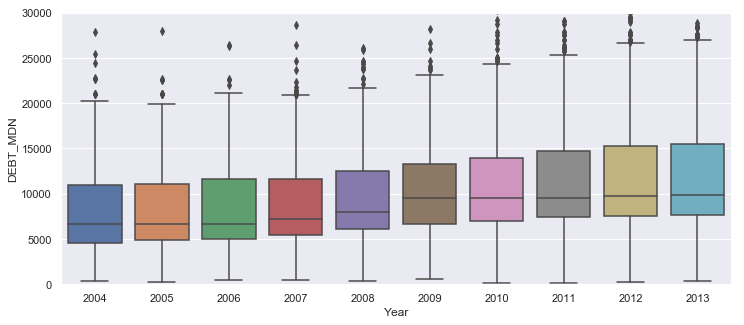

In [15]:
#range of debt values by year, cutting off extreme outliers for readability
sns.set(style="darkgrid")
plt.figure(figsize=(12,5))
plt.ylim(10, 30000)
ax = sns.boxplot(y='DEBT_MDN', x='Year', data=debt)

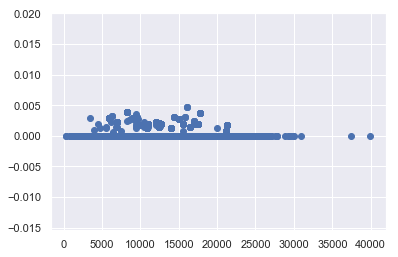

In [16]:
#Does the median debt values recorded in 2012 correlate with death rate?
debt12Death = debt[(debt.Year == 2012) & (np.isnan(debt.DEATH_YR2_RT) == False)]
#filterinfDataframef  = dfObj[(dfObj['Sale'] > 30) & (dfObj['Sale'] < 33) ]
plt.scatter(debt12Death.DEBT_MDN,debt12Death.DEATH_YR2_RT)
plt.show()


#Death as recorded within 2 years:

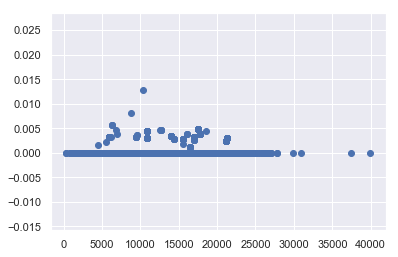

In [17]:
plt.scatter(debt12Death.DEBT_MDN,debt12Death.DEATH_YR8_RT)
plt.show()
#Death as studied within 8 years:

In [ ]:
#Is debt correlated with earnings?